In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

titanic_df = pd.read_csv(r"C:\Users\HOME\Downloads\archive\Titanic-Dataset.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
print("데이터 정보")
print("")
print(titanic_df.info())

데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print("Null 갯수", titanic_df.isnull().sum().sum())

Null 갯수 0


C:\Users\HOME\AppData\Local\Temp\ipykernel_20832\2049988736.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [21]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())
# Cabin 칼럼 데이터의 경우 정리가 이상하게 되어 있음.
# 앞자리 알파벳(등급)이 중요한 의미를 가지므로 데이터를 처리해보자.

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포: 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포: 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [23]:
# Cabin 데이터 값의 앞글자만 떼어내기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [25]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

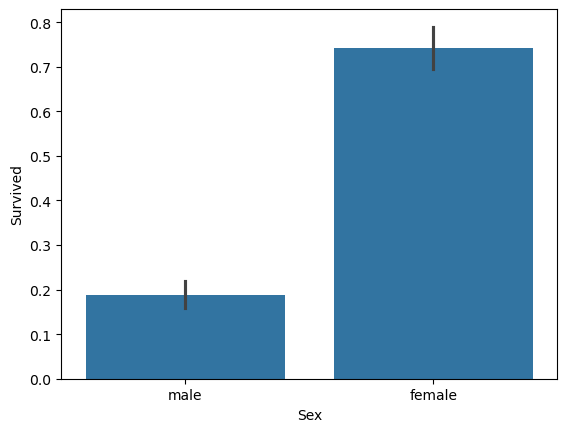

In [29]:
import seaborn as sns
# 시본 클래스를 이용해서 성별에 따른 생존율 시각화
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

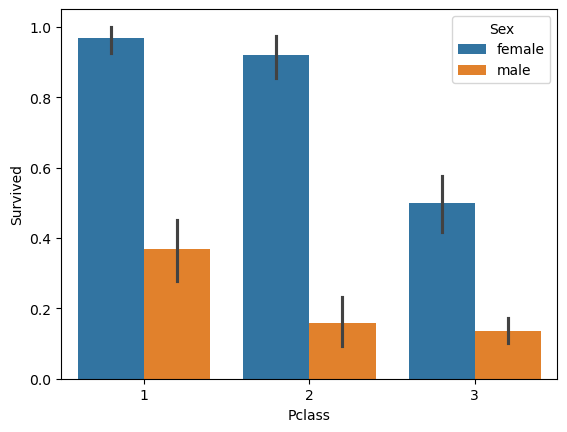

In [35]:
# 좌석 등급과 성별에 따른 생존율 
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

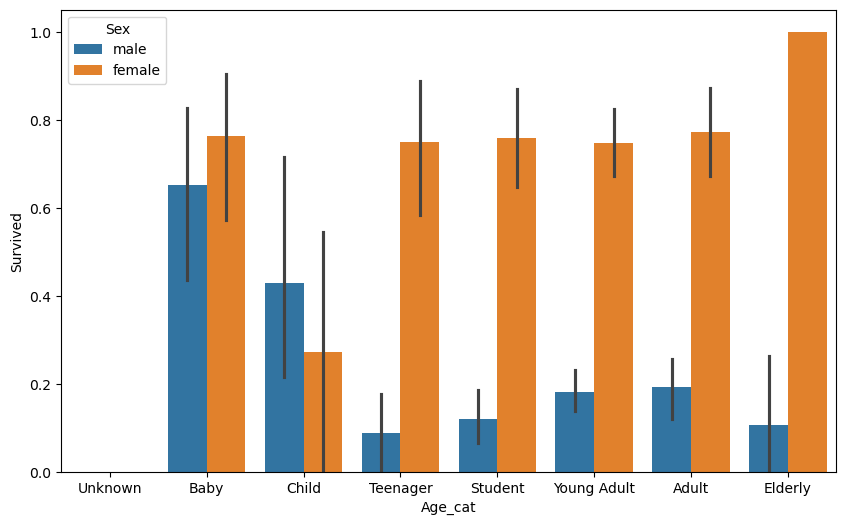

In [37]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DF의 apply lambda식에 사용
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 함수를 반환값으로 지정
# 함수 입력값으로 age 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [39]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [57]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    df['Fare'] = df['Fare'].fillna(0)

    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [59]:
titanic_df = pd.read_csv(r"C:\Users\HOME\Downloads\archive\Titanic-Dataset.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 분류 클래스 생성
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DT 학습 예측 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DT 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RF 학습 예측 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RF 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LR 학습 예측 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LR 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DT 정확도: 0.8045
RF 정확도: 0.8436
LR 정확도: 0.8492


C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 교차검증 수행

In [84]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1: 4f}".format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf)

교차 검증 0 정확도:  0.748603
교차 검증 1 정확도:  0.764045
교차 검증 2 정확도:  0.797753
교차 검증 3 정확도:  0.775281
교차 검증 4 정확도:  0.825843
평균 정확도: 0.7823


### 최적 변수 찾기

In [87]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,3,5,10],
             'min_samples_split': [2,3,5], 'min_samples_leaf': [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# 최적 변수로 다시 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 정확도: 0.8715
